In [281]:
!pip install pandas numpy scipy matplotlib scikit-learn

In [1]:
import pandas as pd
import numpy as np

In [2]:
file_paths = [
    '/Users/Joro/Downloads/COMP3212-Computational_Biology/Coursework/data/blca.tsv', 
    '/Users/Joro/Downloads/COMP3212-Computational_Biology/Coursework/data/brca.tsv',
    '/Users/Joro/Downloads/COMP3212-Computational_Biology/Coursework/data/cesc.tsv',
    '/Users/Joro/Downloads/COMP3212-Computational_Biology/Coursework/data/coad.tsv',
    '/Users/Joro/Downloads/COMP3212-Computational_Biology/Coursework/data/ucec.tsv',
    '/Users/Joro/Downloads/COMP3212-Computational_Biology/Coursework/data/esca.tsv',
    '/Users/Joro/Downloads/COMP3212-Computational_Biology/Coursework/data/gbm.tsv'
]

In [3]:
dataframes = []
for path in file_paths:
    # Read each file into a DataFrame
    data = pd.read_csv(path, sep='\t')
    data['Dataset'] = path.split('/')[-1]
    dataframes.append(data)

combined_data = pd.concat(dataframes, ignore_index=True)
combined_data.to_csv('/Users/Joro/Downloads/COMP3212-Computational_Biology/Coursework/data/combined_data.tsv', sep='\t', index=False)

In [4]:
print(combined_data.head())

             sample           samples  ENSG00000175899.13  ENSG00000166535.18  \
0  TCGA-BT-A20W-11A  TCGA-BT-A20W-11A               24.84               13.18   
1  TCGA-XF-AAN4-01A  TCGA-XF-AAN4-01A               24.69               16.02   
2  TCGA-SY-A9G0-01A  TCGA-SY-A9G0-01A               24.14                7.58   
3  TCGA-ZF-AA5P-01A  TCGA-ZF-AA5P-01A               23.83               14.55   
4  TCGA-K4-A5RI-11A  TCGA-K4-A5RI-11A               23.79               10.98   

    Dataset  
0  blca.tsv  
1  blca.tsv  
2  blca.tsv  
3  blca.tsv  
4  blca.tsv  


In [301]:
data = pd.read_csv('/Users/Joro/Downloads/COMP3212-Computational_Biology/Coursework/data/esca.tsv', sep='\t')
print(data.head())

             sample           samples  ENSG00000175899.13  ENSG00000166535.18
0  TCGA-L5-A4OQ-11A  TCGA-L5-A4OQ-11A               24.38              10.520
1  TCGA-LN-A9FP-01A  TCGA-LN-A9FP-01A               23.55              14.690
2  TCGA-L5-A88S-01A  TCGA-L5-A88S-01A               23.37              16.940
3  TCGA-L5-A8NU-01A  TCGA-L5-A8NU-01A               23.21              15.090
4  TCGA-JY-A93D-01A  TCGA-JY-A93D-01A               23.17               9.408


In [5]:
print(combined_data.describe())

       ENSG00000175899.13  ENSG00000166535.18
count         3397.000000         3397.000000
mean            20.390024           12.045733
std              1.342635            4.281236
min             15.750000            0.000000
25%             19.490000            9.375000
50%             20.390000           11.550000
75%             21.290000           14.760000
max             25.370000           23.930000


In [6]:
print(combined_data.isnull().sum())

sample                0
samples               0
ENSG00000175899.13    0
ENSG00000166535.18    0
Dataset               0
dtype: int64


In [7]:
combined_data.drop(columns=['samples'], inplace=True)

combined_data.rename(columns={
    'ENSG00000175899.13': 'A2M', 
    'ENSG00000166535.18': 'A2ML1'
}, inplace=True)

print(combined_data.head())

             sample    A2M  A2ML1   Dataset
0  TCGA-BT-A20W-11A  24.84  13.18  blca.tsv
1  TCGA-XF-AAN4-01A  24.69  16.02  blca.tsv
2  TCGA-SY-A9G0-01A  24.14   7.58  blca.tsv
3  TCGA-ZF-AA5P-01A  23.83  14.55  blca.tsv
4  TCGA-K4-A5RI-11A  23.79  10.98  blca.tsv


In [8]:
X = combined_data[['A2M', 'A2ML1']]

In [9]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

/Users/Joro/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


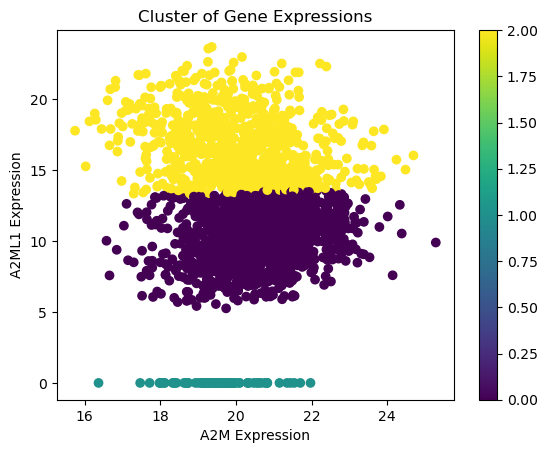

In [11]:
from sklearn.cluster import KMeans

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42) 
clusters = kmeans.fit_predict(X_train)

# Visualizing clusters
import matplotlib.pyplot as plt

plt.scatter(X_train['A2M'], X_train['A2ML1'], c=clusters, cmap='viridis')
plt.xlabel('A2M Expression')
plt.ylabel('A2ML1 Expression')
plt.title('Cluster of Gene Expressions')
plt.colorbar()
plt.show()


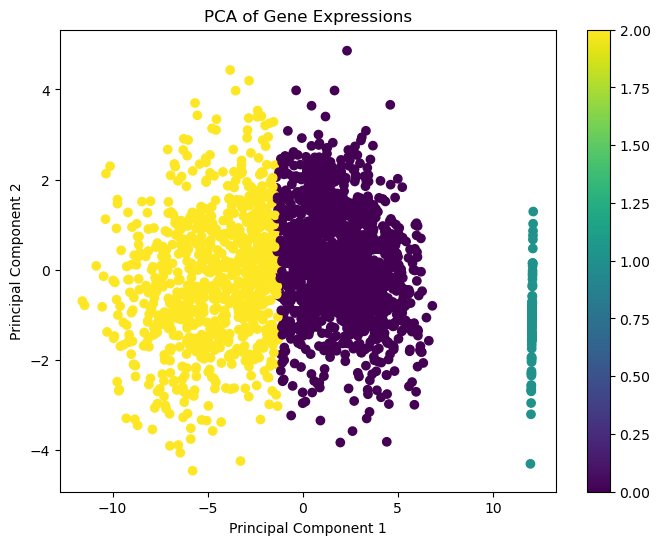

In [12]:
from sklearn.decomposition import PCA

# PCA for dimensionality reduction
pca = PCA(n_components=2)  # reduce to two dimensions for visualization
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')  # using cluster labels from KMeans as colors
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Gene Expressions')
plt.colorbar()
plt.show()


In [13]:
X_train_clustered = X_train.copy()
X_train_clustered['cluster'] = clusters

# Calculate the mean expression of each gene in each cluster
mean_expression = X_train_clustered.groupby('cluster').mean()
print(mean_expression)

               A2M      A2ML1
cluster                      
0        20.589828  10.152616
1        19.550795   0.000000
2        20.051895  16.692741


In [14]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_train, clusters)

print(f"The average silhouette score is : {silhouette_avg}")

The average silhouette score is : 0.5336108270449711


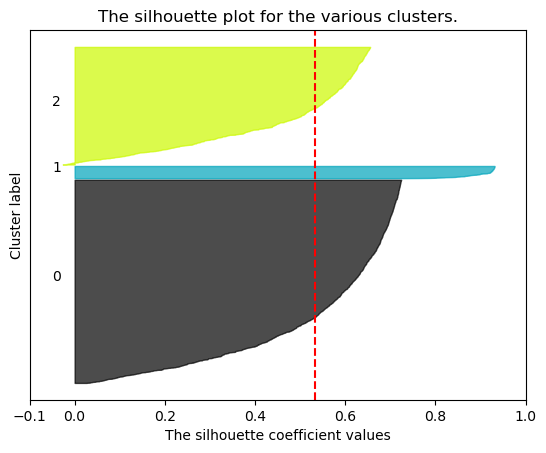

In [15]:
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Calculate the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_train, clusters)
fig, ax = plt.subplots(1, 1)
y_lower = 10
n_clusters = len(np.unique(clusters))
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10

ax.set_title("The silhouette plot for the various clusters.")
ax.set_xlabel("The silhouette coefficient values")
ax.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

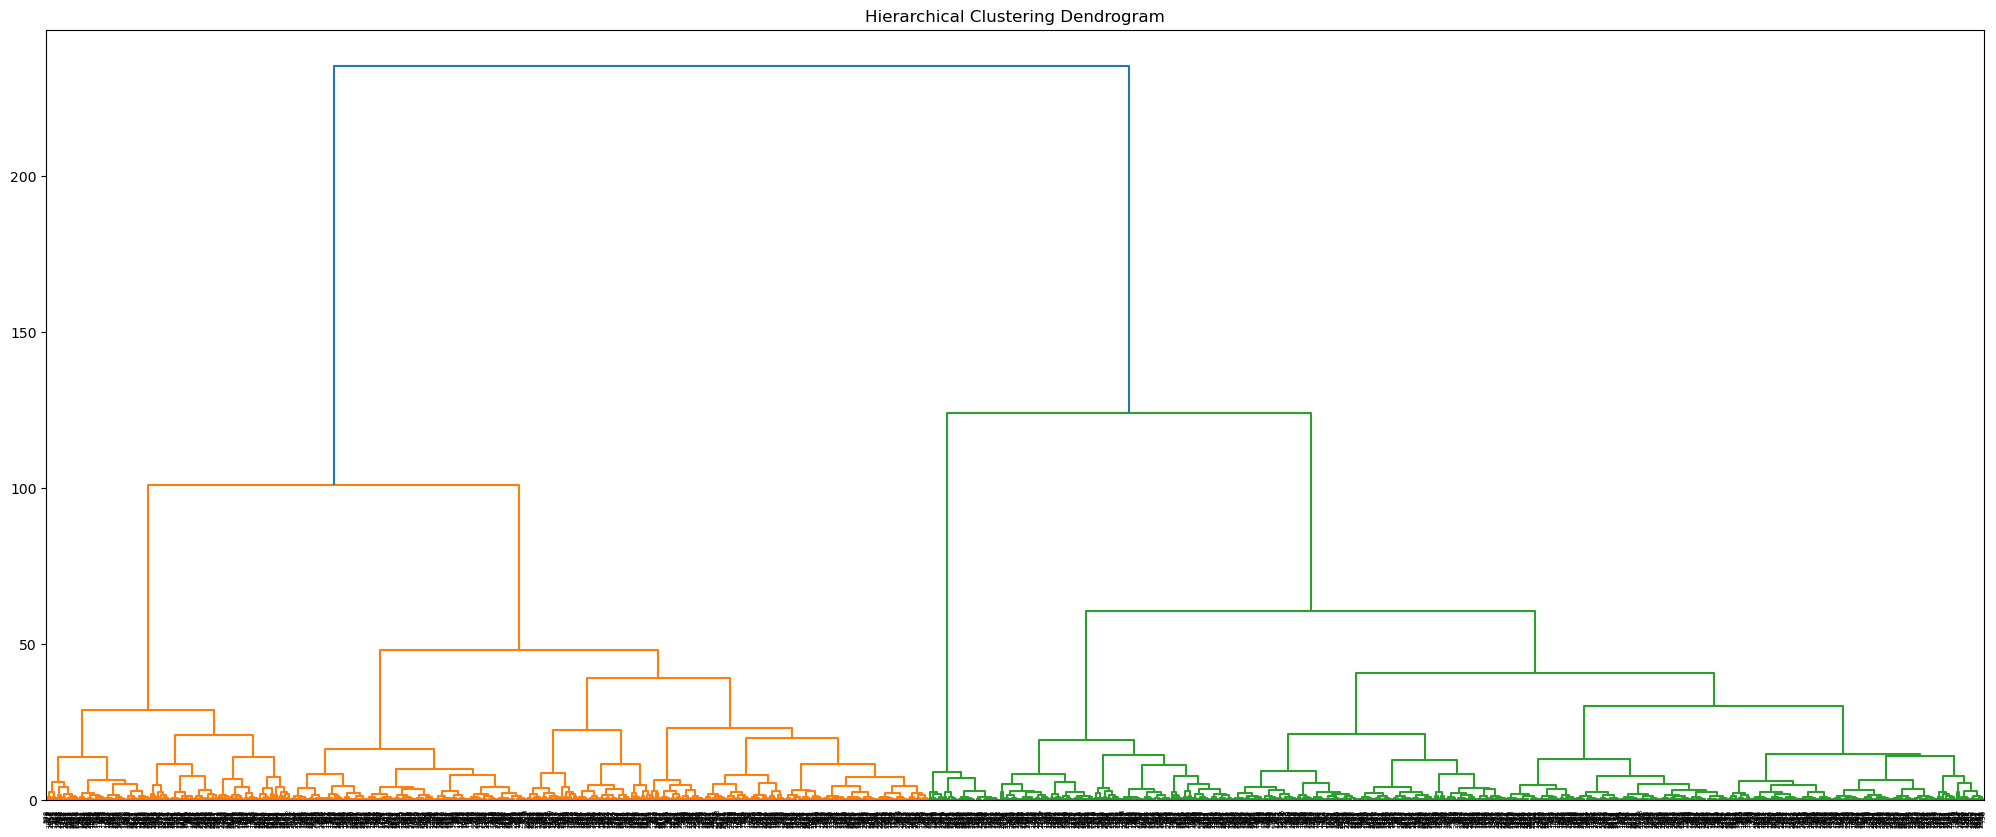

/Users/Joro/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 1, 3, ..., 1, 0, 1])

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Generate the linkage matrix
Z = linkage(X_train, 'ward')

# Plot the hierarchical clustering as a dendrogram.
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z)
plt.show()

# Apply Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(X_train)

In [26]:
# Example mutation analysis: Count frequency of mutations per gene
mutation_counts = combined_data['sample'].value_counts()

# Display the top 10 most frequently mutated genes
print("Top 10 most frequently mutated genes:")
print(mutation_counts.head(10))

Top 10 most frequently mutated genes:
sample
TCGA-BT-A20W-11A    1
TCGA-AA-3930-01A    1
TCGA-AA-3510-01A    1
TCGA-AA-3543-01A    1
TCGA-AA-3660-01A    1
TCGA-CM-6166-01A    1
TCGA-CM-6678-01A    1
TCGA-AA-3970-01A    1
TCGA-D5-6929-01A    1
TCGA-AA-A00A-01A    1
Name: count, dtype: int64


In [25]:
# Example mutation analysis: Count frequency of mutations per gene
mutation_counts = combined_data['A2M'].value_counts()

# Display the top 10 most frequently mutated genes
print("Top 10 unique mutation values with corresponding counts:")
print(mutation_counts.head(10))

Top 10 most frequent mutation values:
A2M
20.06    19
20.32    18
20.17    16
20.19    16
21.18    16
20.25    15
19.95    15
20.50    15
20.59    15
20.66    14
Name: count, dtype: int64


Outliers based on IQR method:
0       24.84
1       24.69
2       24.14
425     16.66
426     16.66
427     16.61
428     16.30
429     16.27
430     25.37
431     25.28
432     24.90
433     24.81
434     24.48
435     24.34
436     24.28
437     24.24
438     24.08
439     24.03
440     24.01
1944    16.69
1945    16.69
1946    16.58
1947    16.45
1948    16.45
1949    16.33
1950    16.23
1951    16.13
1952    16.07
1953    16.03
1954    15.78
1955    15.75
2467    16.37
3051    24.38
3223    16.68
3224    24.33
3225    24.16
3226    24.11
Name: A2M, dtype: float64


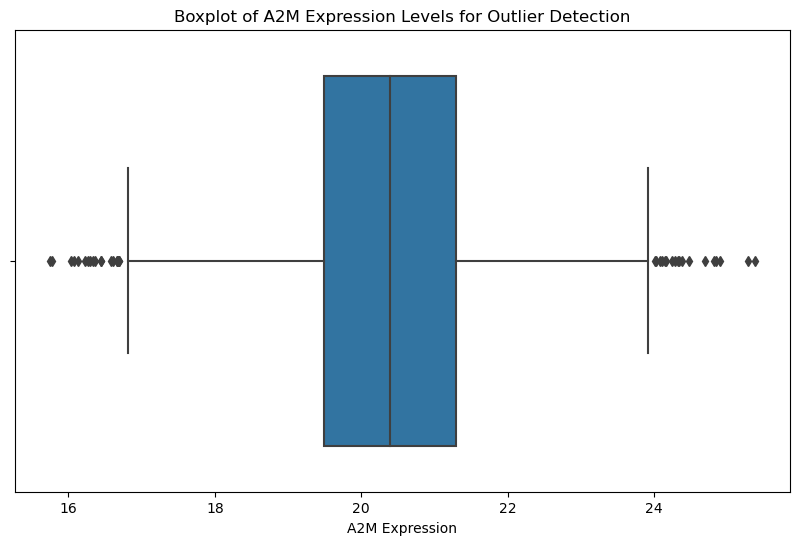

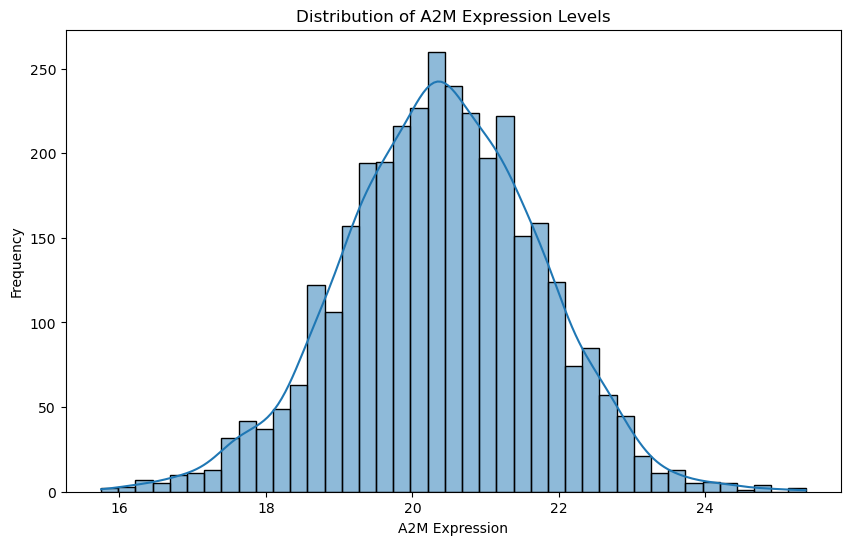

Shapiro-Wilk Test statistics=0.999, p-value=0.015
Sample does not look Gaussian 
Skewness of distribution: -0.0646528653597088


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Select the 'A2M' column for analysis
a2m_data = combined_data['A2M']
# Outlier Detection using Interquartile Range (IQR)
Q1 = a2m_data.quantile(0.25)
Q3 = a2m_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = a2m_data[(a2m_data < lower_bound) | (a2m_data > upper_bound)]
print("Outliers based on IQR method:")
print(outliers)
# Plotting the results
plt.figure(figsize=(10, 6))
sns.boxplot(x=a2m_data)
plt.title('Boxplot of A2M Expression Levels for Outlier Detection')
plt.xlabel('A2M Expression')
plt.show()

# Distribution Analysis and Histogram with Kernel Density Estimate (KDE)
plt.figure(figsize=(10, 6))
sns.histplot(a2m_data, kde=True)
plt.title('Distribution of A2M Expression Levels')
plt.xlabel('A2M Expression')
plt.ylabel('Frequency')
plt.show()

# Normality Test and Shapiro-Wilk Test
stat, p_value = stats.shapiro(a2m_data)
print('Shapiro-Wilk Test statistics=%.3f, p-value=%.3f' % (stat, p_value))
if p_value > 0.05:
    print('Sample looks Gaussian ')
else:
    print('Sample does not look Gaussian ')
# Skewness Test
skewness = stats.skew(a2m_data)
print('Skewness of distribution:', skewness)

In [27]:
mutation_counts = combined_data['A2ML1'].value_counts()

# Display the top 10 most frequently mutated genes
print("Top 10 unique mutation values with corresponding counts:")
print(mutation_counts.head(10))

Top 10 unique mutation values with corresponding counts:
A2ML1
0.00     116
10.75     11
12.94     10
13.18      8
10.58      8
12.02      8
10.39      8
11.42      8
10.08      8
14.34      8
Name: count, dtype: int64


(121, 2)
eps=0.1, min_samples=3, number of clusters: 1
eps=0.1, min_samples=5, number of clusters: 1
eps=0.1, min_samples=7, number of clusters: 1
eps=0.1, min_samples=9, number of clusters: 1
eps=0.3, min_samples=3, number of clusters: 5
eps=0.3, min_samples=5, number of clusters: 1
eps=0.3, min_samples=7, number of clusters: 1
eps=0.3, min_samples=9, number of clusters: 1
eps=0.5, min_samples=3, number of clusters: 12
eps=0.5, min_samples=5, number of clusters: 2
eps=0.5, min_samples=7, number of clusters: 2
eps=0.5, min_samples=9, number of clusters: 1
eps=0.7, min_samples=3, number of clusters: 10
eps=0.7, min_samples=5, number of clusters: 4
eps=0.7, min_samples=7, number of clusters: 4
eps=0.7, min_samples=9, number of clusters: 3
eps=0.9, min_samples=3, number of clusters: 5
eps=0.9, min_samples=5, number of clusters: 4
eps=0.9, min_samples=7, number of clusters: 5
eps=0.9, min_samples=9, number of clusters: 4


Text(0, 0.5, 'Feature 1')

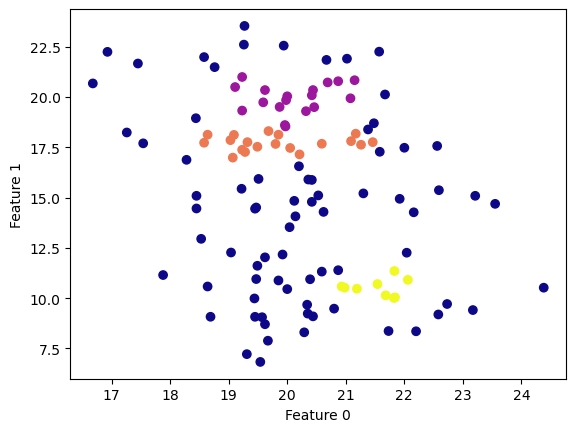

In [314]:
from sklearn.cluster import DBSCAN
print(X_train.shape)

# Convert X_train to a numpy array
X_train_np = X_train.to_numpy()

# Try different values of eps and min_samples
for eps in [0.1, 0.3, 0.5, 0.7, 0.9]:
    for min_samples in [3, 5, 7, 9]:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        db_clusters = db.fit_predict(X_train_np)
        print(f"eps={eps}, min_samples={min_samples}, number of clusters: {len(np.unique(db_clusters))}")

# If X_train has only one feature, plot it against the cluster assignments
if X_train_np.shape[1] == 1:
    plt.scatter(X_train_np[:, 0], db_clusters, cmap="plasma")
else:
    plt.scatter(X_train_np[:, 0], X_train_np[:, 1], c=db_clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [315]:
from sklearn.decomposition import PCA

n_components = min(X.shape[0], X.shape[1])
pca = PCA(n_components=n_components)
pca.fit(X)

# Get the loadings
loadings = pca.components_.T

# Get the gene names
gene_names = X.columns

# Get the top 70 genes for each principal component
top_genes = {}
for i in range(n_components):
    top_genes[i] = [gene_names[j] for j in np.abs(loadings[:, i]).argsort()[::-1][:70]]

# Print the top 70 genes for each principal component
for i in range(n_components):
    print(f"Principal Component {i+1}:")
    print(top_genes[i])
    print()

Principal Component 1:
['A2ML1', 'A2M']

Principal Component 2:
['A2M', 'A2ML1']



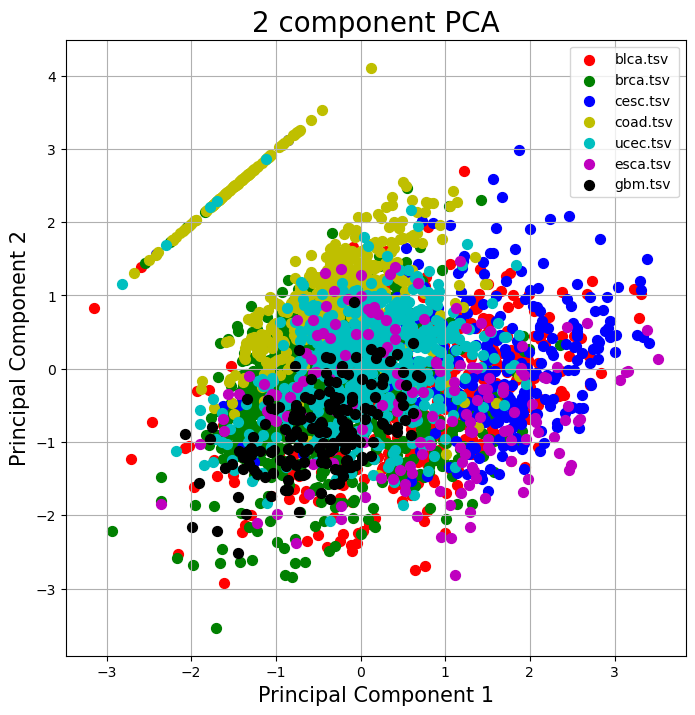

In [316]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separating out the features
features = ['A2M', 'A2ML1']
x = combined_data.loc[:, features].values
# Standardizing the features before applying PCA
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
# Create a DataFrame with the PCA results
principalDf = pd.DataFrame(data = principalComponents, columns = 
                           ['principal component 1', 'principal component 2'])
# Concatenate the dataset labels to this DataFrame
finalDf = pd.concat([principalDf, combined_data[['Dataset']]], axis = 1)

# Plotting
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
# Color mapping by 'Dataset'
datasets = finalDf['Dataset'].unique()
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k']

for dataset, color in zip(datasets, colors):
    indicesToKeep = finalDf['Dataset'] == dataset
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(datasets)
ax.grid()
plt.show()


In [317]:
from scipy.stats import ttest_ind

X_train_clustered = X_train.copy()
X_train_clustered['cluster'] = clusters

# Perform a t-test for each gene
p_values = []
for gene in X_train.columns:
    group1 = X_train_clustered[X_train_clustered['cluster'] == 0][gene]
    group2 = X_train_clustered[X_train_clustered['cluster'] == 1][gene]
    t_stat, p_val = ttest_ind(group1, group2)
    p_values.append(p_val)

# Correct for multiple testing
from statsmodels.stats.multitest import multipletests
reject, pvals_corrected, _, _ = multipletests(p_values, method='fdr_bh')

# Print the names of the differentially expressed genes
differentially_expressed_genes = X_train.columns[reject]
print(differentially_expressed_genes)

Index(['A2ML1'], dtype='object')


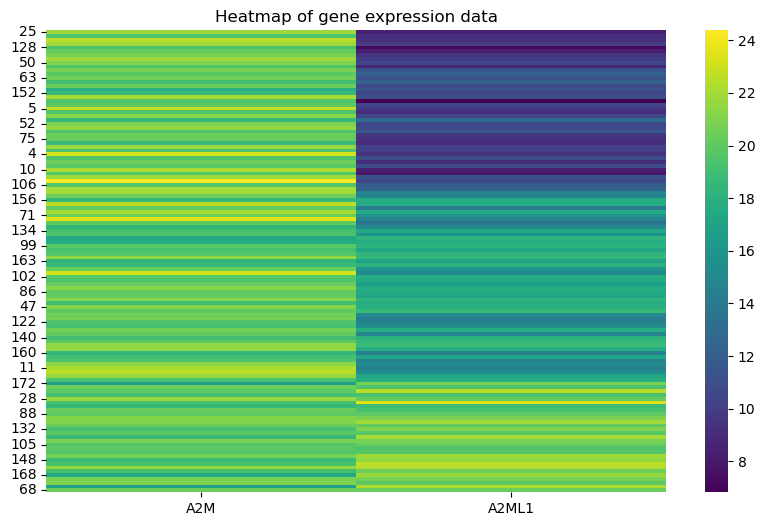

In [318]:
import seaborn as sns

# Sort the data by cluster labels
X_train_sorted = X_train_clustered.sort_values(by='cluster')

# Drop the 'cluster' column for the heatmap
X_train_sorted_dropped = X_train_sorted.drop('cluster', axis=1)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(X_train_sorted_dropped, cmap='viridis')
plt.title('Heatmap of gene expression data')
plt.show()

In [319]:
print(len(X_train))
print(len(clusters))

121
121


In [320]:
from sklearn.cluster import KMeans

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X_train)

# Get the cluster labels
clusters = kmeans.labels_

/Users/Joro/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [321]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, clusters)

# Get feature importances
importances = clf.feature_importances_

# Map importances to the corresponding gene names
importances_df = pd.DataFrame({
    'gene': X_train.columns,
    'importance': importances
})

# Sort by importance
importances_df.sort_values(by='importance', ascending=False, inplace=True)

print(importances_df.head())

    gene  importance
1  A2ML1    0.798839
0    A2M    0.201161


In [322]:
from sklearn.model_selection import cross_val_score

clf = tree.DecisionTreeClassifier()

# Perform 5-fold cross-validation
scores = cross_val_score(clf, X_train, clusters, cv=5)

print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean()}")

Cross-validation scores: [1.         1.         1.         0.95833333 0.95833333]
Average cross-validation score: 0.9833333333333334


In [323]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly', 'sigmoid']}

# Create a GridSearchCV object
grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2, cv=5)

# Fit the model to the data
grid.fit(X_train, clusters)

# Print the best parameters
print(grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

In [324]:
print(X.shape)
print(y.shape)

(173, 2)
(173,)


In [325]:
from sklearn import tree

# Define the parameter grid
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 2, 3, 4, 5, 6]}

# Create a GridSearchCV object
grid = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, refit=True, verbose=2, cv=5)

# Fit the model to the data
grid.fit(X_train, clusters)

# Print the best parameters
print(grid.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .....................criterion=gini, max_depth=None; total time=   0.0s
[CV] END .....................criterion=gini, max_depth=None; total time=   0.0s
[CV] END .....................criterion=gini, max_depth=None; total time=   0.0s
[CV] END .....................criterion=gini, max_depth=None; total time=   0.0s
[CV] END .....................criterion=gini, max_depth=None; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini,

In [336]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict the labels for SVM
y_pred_svm = clf_svm.predict(X_train)

# Generate confusion matrix for SVM
print(confusion_matrix(clusters, y_pred_svm))

# Generate classification report for SVM
print(classification_report(clusters, y_pred_svm))

NameError: name 'clf_svm' is not defined

In [326]:
from sklearn import tree

# Train the model with the best parameters
clf = tree.DecisionTreeClassifier(**grid.best_params_)
clf.fit(X_train, clusters)

# Predict the labels
y_pred = clf.predict(X_train)

# Generate confusion matrix
print(confusion_matrix(clusters, y_pred))

# Generate classification report
print(classification_report(clusters, y_pred))

[[24  0  0  0  0]
 [ 0 18  0  0  0]
 [ 0  0 21  0  0]
 [ 0  0  0 35  0]
 [ 0  0  0  0 23]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        35
           4       1.00      1.00      1.00        23

    accuracy                           1.00       121
   macro avg       1.00      1.00      1.00       121
weighted avg       1.00      1.00      1.00       121



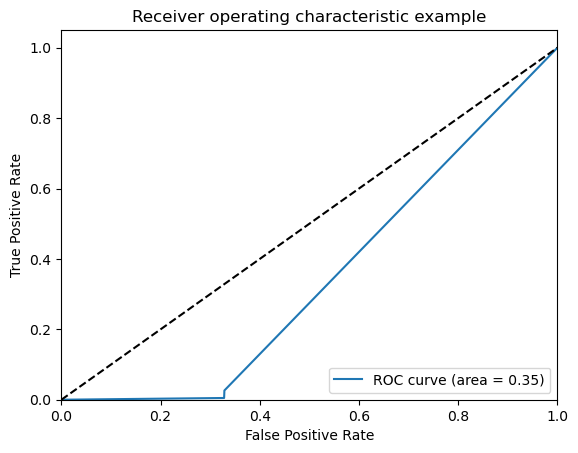

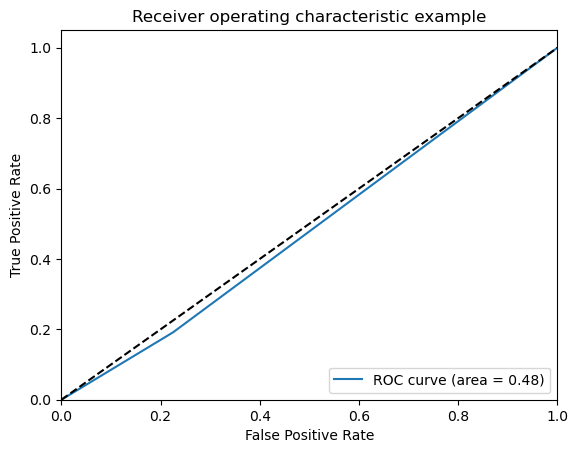

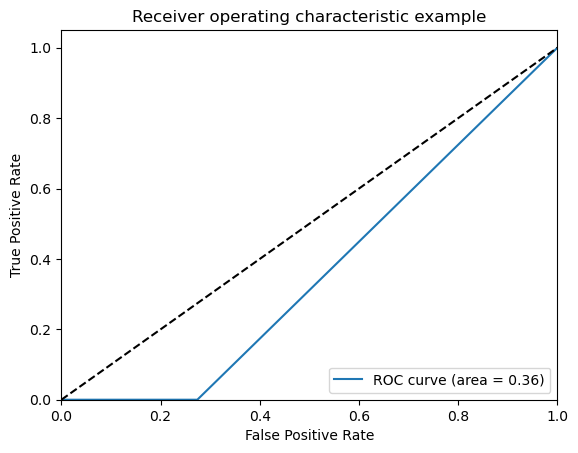

In [338]:
# Predict the probabilities for Decision Tree
y_score = clf_tree.predict_proba(X_train)

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [338]:
clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)

KeyError: "['target'] not found in axis"

In [ ]:
# Predict the probabilities for Decision Tree
y_score = clf_tree.predict_proba(X_train)

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    # Compute standard ROC curve
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
    # Reverse the ROC by subtracting TPR and FPR from 1
    fpr[i] = 1 - fpr[i]
    tpr[i] = 1 - tpr[i]
    # Compute AUC on the reversed ROC Curve
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a reversed ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='Reversed ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [1, 0], 'k--') 
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Reversed Receiver operating characteristic example')
    plt.legend(loc="upper left") 
    plt.show()


In [335]:
from sklearn import tree
# Predict the probabilities for Decision Tree
y_score = clf_tree.predict_proba(X_train)

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

NameError: name 'clf_tree' is not defined